# STAT 557: Data Mining - Project 1 

By: Rakshith Badarinath

The aim of this project is to practice linear classiﬁcation methods and QDA and study basic techniques of dimension reduction.

Requirements for the project are listed below.
1. Apply LDA, QDA and logistic regression to your dataset and compare them.
2. Study whether dimension reduction improves classiﬁcation. You can use principle components, a certain feature selection procedure, etc.
3. You are encouraged but not required to use cross-validation to evaluate your classiﬁcation algorithm. If you decide not to use cross-validation, you can divide the data randomly into a training set and a testing set.
4. Write a report. In the report, you are required to explain the contribution of each individual group member.


## Introduction to LDA and QDA Classifiers

Linear Discriminant Analysis and Quadratic Discriminant Analysis are two classic classifiers. As their names suggest, a linear and a quadratic decision surface, respectively.

These classifiers are attractive because they have closed-form solutions that can be easily computed, are inherently multiclass, have proven to work well in practice and have no hyperparameters to tune

## Part 1: LDA Classification

In [1]:
# Load required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [2]:
# Load data
attr_names = ['Variance','Skewness','Kurtosis','Entropy','class_label']
bank_note_data = pd.read_table('data_banknote_authentication.txt',delimiter=',',header=None, names=attr_names )
target_names = ['Fake Note','Authentic Note']

In [3]:
# Verify Data is correctly loaded
print(bank_note_data.shape)
bank_note_data

(1372, 5)


,Variance,Skewness,Kurtosis,Entropy,class_label
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


In [4]:
# Seperate Class labels and Attributes
X = bank_note_data[['Variance','Skewness','Kurtosis','Entropy']]
y = bank_note_data['class_label']

In [5]:
# verify attribute-label seperation
print(X.shape)
print(y.shape)

(1372, 4)
(1372,)


## Create Test and Training Data sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0) #does 75-25 partision (75% to train and 25% to test)

## Intial Data Analysis (Train Data Set) - Feature Pair Plot

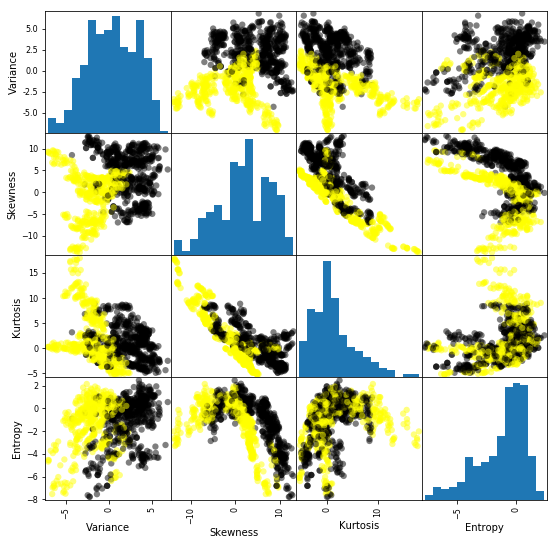

In [7]:
from matplotlib import cm
from pandas.plotting import scatter_matrix

fig = plt.figure()
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c=y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)
plt.show()

## Fit LDA Classifier

In [8]:
# fit LDA Classifier - without dimensionality reduction
lda = LDA(n_components=4) # default solver is svd - single value decomposition (can also use lsqr and eigen value)
x_lda = lda.fit(X_train,y_train)

In [9]:
# Percentage of variance explained for each components 
print('explained variance ratio (first two components): %s'
      % str(lda.explained_variance_ratio_))

explained variance ratio (first two components): [ 1.]


### Get Attributes of LDA fit

In [10]:
print('priors', lda.priors_)
print('Class Means', lda.means_)
print('Coefficients', lda.coef_)
print('Intercept',lda.intercept_)
print('xbar',lda.xbar_)
print('classes',lda.classes_)
print('Explained Variance ratio',lda.explained_variance_ratio_)

priors [ 0.55102041  0.44897959]
Class Means [[ 2.27600088  4.12924765  0.8666998  -1.12149612]
 [-1.88124988 -0.90234977  2.08262699 -1.2550301 ]]
Coefficients [[-4.36765852 -2.37853803 -3.09273863 -0.03606639]]
Intercept [ 9.0128161]
xbar [ 0.40948013  1.87016309  1.41262629 -1.18145016]
classes [0 1]
Explained Variance ratio [ 1.]


### Get Performance Metrics for LDA Classifier

In [11]:
y_pred_lda = lda.predict(X_test)
print('Bank Note authentication dataset')
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Bank Note authentication dataset
Accuracy of LDA classifier on training set: 0.98
Accuracy of LDA classifier on test set: 0.97


### LDA - Compute # of Mismatches

In [12]:
# Compute number and % of mismatches

m_count=0

for i in range(0,len(y_test)):
    if(y_pred_lda[i]!=np.asarray(y_test)[i]):
        m_count +=1

num_of_mismatch_lda = m_count
percent_mismatch_lda = m_count/len(y_test)
    
print('Number of mis-matches: ',m_count)
print('% of mismatches: {:.3f}'.format(percent_mismatch_lda))
print('% Accuracy of LDA Classifier: {:.3f}'.format( 1-(percent_mismatch_lda))) # Note: this matches with lda.score()

Number of mis-matches:  12
% of mismatches: 0.035
% Accuracy of LDA Classifier: 0.965


### LDA Cross Validation Results

In [13]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lda, X, y,cv=5)

print('Cross-validation scores {5-fold}: ',cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores {5-fold}:  [ 0.97818182  0.97454545  0.97445255  0.98540146  0.97080292]
Mean cross-validation score (5-fold): 0.977


### LDA Classification Report

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,y_pred_lda))
print(confusion_matrix(y_test,y_pred_lda))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97       195
          1       0.93      1.00      0.96       148

avg / total       0.97      0.97      0.97       343

[[183  12]
 [  0 148]]


## Plot Classification boundary for a pair of Attributes (Representation Purpose Only)

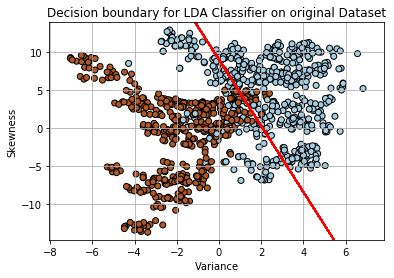

In [15]:
# LDA Classification results - Decision boundary (plot)

plt.figure()
#plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(np.asarray(X_train)[:, 0], np.asarray(X_train)[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Decision boundary for LDA Classifier on original Dataset')
# y = mx + C - decision boundary
plt.plot(np.asarray(X_train)[:,0],lda.coef_[0,0]*np.asarray(X_train)[:,0]+lda.intercept_,'r-')
plt.xlim(np.asarray(X_train)[:,0].min()-1, np.asarray(X_train)[:,0].max()+1)
plt.ylim(np.asarray(X_train)[:,1].min()-1, np.asarray(X_train)[:,1].max()+1)
plt.xticks()
plt.yticks()
plt.grid(all)

plt.show()

## Part 2: QDA Classification

In [16]:
qda = QDA(store_covariance='True')
x_qda = qda.fit(X_train,y_train)

### Get QDA Fit Attributes

In [17]:
# Covariance matrices  
print('Covariance Matrix: ',qda.covariance_)
print('Class Means: ',qda.means_)
print('Priors: ',qda.priors_)

Covariance Matrix:  [array([[  4.03638146,  -2.59717069,  -2.02807708,   1.7410892 ],
       [ -2.59717069,  26.70319173, -12.38632432,  -7.4108662 ],
       [ -2.02807708, -12.38632432,  10.29386607,   2.9046881 ],
       [  1.7410892 ,  -7.4108662 ,   2.9046881 ,   4.4084257 ]]), array([[  3.63139333,   0.55082731,  -4.65334722,   1.26144109],
       [  0.55082731,  29.0549271 , -24.82740102,  -5.90475185],
       [ -4.65334722, -24.82740102,  27.28507931,   3.15470114],
       [  1.26144109,  -5.90475185,   3.15470114,   4.33962009]])]
Class Means:  [[ 2.27600088  4.12924765  0.8666998  -1.12149612]
 [-1.88124988 -0.90234977  2.08262699 -1.2550301 ]]
Priors:  [ 0.55102041  0.44897959]


### Performance Metrics for QDA Classifier

In [18]:
# Prediction using QDA
y_pred_qda = qda.predict(X_test)
print('Iris dataset')
print('Accuracy of QDA classifier on training set: {:.2f}'
     .format(qda.score(X_train, y_train)))
print('Accuracy of QDA classifier on test set: {:.2f}'
     .format(qda.score(X_test, y_test)))

Iris dataset
Accuracy of QDA classifier on training set: 0.98
Accuracy of QDA classifier on test set: 0.98


In [19]:
# Compute number and % of mismatches

m_count_qda=0

for i in range(0,len(y_test)):
    if(y_pred_qda[i]!=np.asarray(y_test)[i]):
        m_count_qda +=1

num_of_mismatch_qda = m_count_qda
percent_mismatch_qda = m_count_qda/len(y_test)
    
print('Number of mis-matches: ',m_count_qda)
print('% of mismatches: {:.3f}'.format(percent_mismatch_qda))
print('% Accuracy of LDA Classifier: {:.3f}'.format( 1-(percent_mismatch_qda))) # Note: this matches with qda.score()

Number of mis-matches:  7
% of mismatches: 0.020
% Accuracy of LDA Classifier: 0.980


### QDA Cross Validation 

In [20]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(qda, X, y,cv=5)

print('Cross-validation scores {5-fold}: ',cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores {5-fold}:  [ 0.98909091  0.99272727  0.97810219  0.99270073  0.98175182]
Mean cross-validation score (5-fold): 0.987


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_qda))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98       195
          1       0.95      1.00      0.98       148

avg / total       0.98      0.98      0.98       343



## Dimensionality Reduction 

### Dimensionality Reduction using PCA

Since there are 4 attributes, samllest dimension reduction results in atmost 3 components. Lets create three PCA components since three components explain about 96% of the data in this case 

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
x_pca_r2 = pca.fit_transform(X)

In [23]:
x_pca_r2.shape

(1372, 3)

In [24]:
# Percentage of variance explained for each components 
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.76132409  0.1419049   0.06701767]


### LDA on PCA reduced Data

In [25]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca_r2,y,random_state=0) #does 75-25 partision (75% to train and 25% to test)

In [26]:
X_pca_train

array([[ -8.72110902,  -1.65568271,   0.30959427],
       [-10.54188251,   0.42018822,   1.20309865],
       [ 13.99282152,   2.64515906,   0.49255449],
       ..., 
       [ -1.07278938,  -2.03403087,  -3.13487527],
       [  3.94336464,  -1.71646011,   2.66838684],
       [ -6.7036658 ,   6.35181763,   3.88021857]])

In [27]:
# fit LDA Classifier for dimensionality reduced data
lda = LDA() # default solver is svd - single value decomposition (can also use lsqr and eigen value)
x_lda_pca = lda.fit(X_pca_train,y_pca_train)

In [28]:
x_lda_pca

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [29]:
# Percentage of variance explained for each components 
print('explained variance ratio (first two components): %s'
      % str(lda.explained_variance_ratio_))

explained variance ratio (first two components): [ 1.]


### Metrics for LDA after Dimension Reduction using PCA

In [30]:
y_pred_lda_pca = lda.predict(X_pca_test)
print('Bank Note authentication dataset')
print('Accuracy of LDA classifier on dimensionally reduced training set: {:.3f}'
     .format(lda.score(X_pca_train, y_pca_train)))
print('Accuracy of LDA classifier on dimensionally reduced test set: {:.3f}'
     .format(lda.score(X_pca_test, y_pca_test)))

Bank Note authentication dataset
Accuracy of LDA classifier on dimensionally reduced training set: 0.970
Accuracy of LDA classifier on dimensionally reduced test set: 0.959


In [31]:
print(classification_report(y_pca_test,y_pred_lda_pca))

             precision    recall  f1-score   support

          0       1.00      0.93      0.96       195
          1       0.91      1.00      0.95       148

avg / total       0.96      0.96      0.96       343



In [32]:
# Compute number and % of mismatches

m_count=0

for i in range(0,len(y_pca_test)):
    if(y_pred_lda_pca[i]!=np.asarray(y_pca_test)[i]):
        m_count +=1

num_of_mismatch_lda = m_count
percent_mismatch_lda = m_count/len(y_pca_test)
    
print('Number of mis-matches: ',m_count)
print('% of mismatches: {:.3f}'.format(percent_mismatch_lda))
print('% Accuracy of LDA Classifier: {:.3f}'.format( 1-(percent_mismatch_lda))) # Note: this matches with lda.score()

Number of mis-matches:  14
% of mismatches: 0.041
% Accuracy of LDA Classifier: 0.959


In [33]:
cv_scores = cross_val_score(lda, x_pca_r2, y,cv=5)

print('Cross-validation scores {5-fold}: ',cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores {5-fold}:  [ 0.96727273  0.95272727  0.96715328  0.98175182  0.96715328]
Mean cross-validation score (5-fold): 0.967


## QDA on PCA reduced Data

In [34]:
# fit QDA Classifier for dimensionality reduced data
qda = QDA() # default solver is svd - single value decomposition (can also use lsqr and eigen value)
x_qda_pca = qda.fit(X_pca_train,y_pca_train)

### Metrics for QDA after Dimension Reduction using PCA

In [35]:
y_pred_qda_pca = qda.predict(X_pca_test)
print('Bank Note authentication dataset')
print('Accuracy of QDA classifier on dimensionally reduced training set: {:.3f}'
     .format(qda.score(X_pca_train, y_pca_train)))
print('Accuracy of QDA classifier on dimensionally reduced test set: {:.3f}'
     .format(qda.score(X_pca_test, y_pca_test)))

Bank Note authentication dataset
Accuracy of QDA classifier on dimensionally reduced training set: 0.991
Accuracy of QDA classifier on dimensionally reduced test set: 0.974


In [36]:
print(classification_report(y_pca_test,y_pred_qda_pca))

             precision    recall  f1-score   support

          0       1.00      0.95      0.98       195
          1       0.94      1.00      0.97       148

avg / total       0.98      0.97      0.97       343



In [37]:
# Compute number and % of mismatches

m_count=0

for i in range(0,len(y_pca_test)):
    if(y_pred_qda_pca[i]!=np.asarray(y_pca_test)[i]):
        m_count +=1

num_of_mismatch_qda = m_count
percent_mismatch_qda = m_count/len(y_pca_test)
    
print('Number of mis-matches: ',m_count)
print('% of mismatches: {:.3f}'.format(percent_mismatch_qda))
print('% Accuracy of QDA Classifier: {:.3f}'.format( 1-(percent_mismatch_qda))) # Note: this matches with qda

Number of mis-matches:  9
% of mismatches: 0.026
% Accuracy of QDA Classifier: 0.974


In [38]:
cv_scores = cross_val_score(qda, x_pca_r2, y,cv=5)

print('Cross-validation scores {5-fold}: ',cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores {5-fold}:  [ 0.98181818  0.98909091  0.98540146  0.99635036  0.98175182]
Mean cross-validation score (5-fold): 0.987


### Plotting results of LDA using PCA dimension reduction 

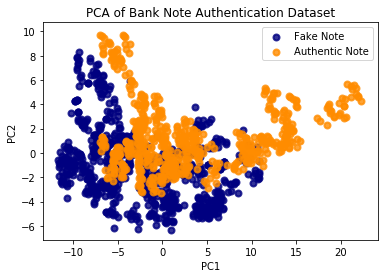

In [39]:
# Plot results

plt.figure()
colors = ['navy', 'darkorange']
lw = 2

# PLot PCA dimensionality reduction plot
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_pca_r2[y == i, 0], x_pca_r2[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA of Bank Note Authentication Dataset')
plt.show()

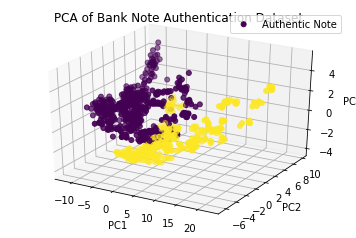

In [40]:
# Plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig  = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_pca_train[:,0], X_pca_train[:,1], X_pca_train[:,2], c = y_pca_train, marker = 'o', s=25, label=target_name)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title('PCA of Bank Note Authentication Dataset')
plt.show()